<a href="https://colab.research.google.com/github/693080593/research/blob/master/%5BTotal%5D_cHB_Biocrude_KFold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

# Import supplementary visualizations code visuals.py
import visuals as vs


# Pretty display for notebooks
%matplotlib inline

# Load the dataset
data = pd.read_csv(r'/content/Feed Effect on Biocrude Yield Data ML 080920.csv')
Oil_Yields = data['Bio-crude Oil Yield']
Features = data.drop('Bio-crude Oil Yield', axis = 1)

# Success
print ("Bio-crude dataset has {} data points with {} variables each.".format(*data.shape))
data.shape

# data[:240:30]


Bio-crude dataset has 225 data points with 8 variables each.


(225, 8)

In [2]:
# TODO: Minimum price of the data
minimum_Oil_Yields = np.min(Oil_Yields)

# TODO: Maximum price of the data
maximum_Oil_Yields = np.max(Oil_Yields)

# TODO: Mean price of the data
mean_Oil_Yields = np.mean(Oil_Yields)

# TODO: Median price of the data
median_Oil_Yields = np.median(Oil_Yields)

# TODO: Standard deviation of prices of the data
std_Oil_Yields = np.std(Oil_Yields)

# Show the calculated statistics

print("Statistics for bio-crude dataset:\n")
print("Minimum bio-crude oil yield:{: .2f} wt%".format(minimum_Oil_Yields))
print("Maximum bio-crude oil yield:{: .2f} wt%".format(maximum_Oil_Yields))
print("Mean bio-crude oil yield:{: .2f} wt%".format(mean_Oil_Yields))
print("Median bio-crude oil yield:{: .2f} wt%".format(median_Oil_Yields))
print("Standard deviation of bio-crude oil yield:{: .2f} wt%".format(std_Oil_Yields))

data.describe()

Statistics for bio-crude dataset:

Minimum bio-crude oil yield: 0.10 wt%
Maximum bio-crude oil yield: 95.86 wt%
Mean bio-crude oil yield: 27.44 wt%
Median bio-crude oil yield: 24.70 wt%
Standard deviation of bio-crude oil yield: 16.71 wt%


,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,Bio-crude Oil Yield
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,11.914957,26.309120,17.238889,7.373533,17.048222,9.141262,6.412529,27.438684
std,20.186968,25.336847,25.591166,15.388090,23.677315,17.012555,10.787539,16.748694
min,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.100000
25%,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,15.900000
50%,3.500000,23.077000,0.001000,0.001000,8.700000,0.001000,1.100000,24.700000
75%,13.880000,46.420000,29.200000,8.800000,25.460000,14.200000,7.000000,36.300000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,47.500000,95.860000


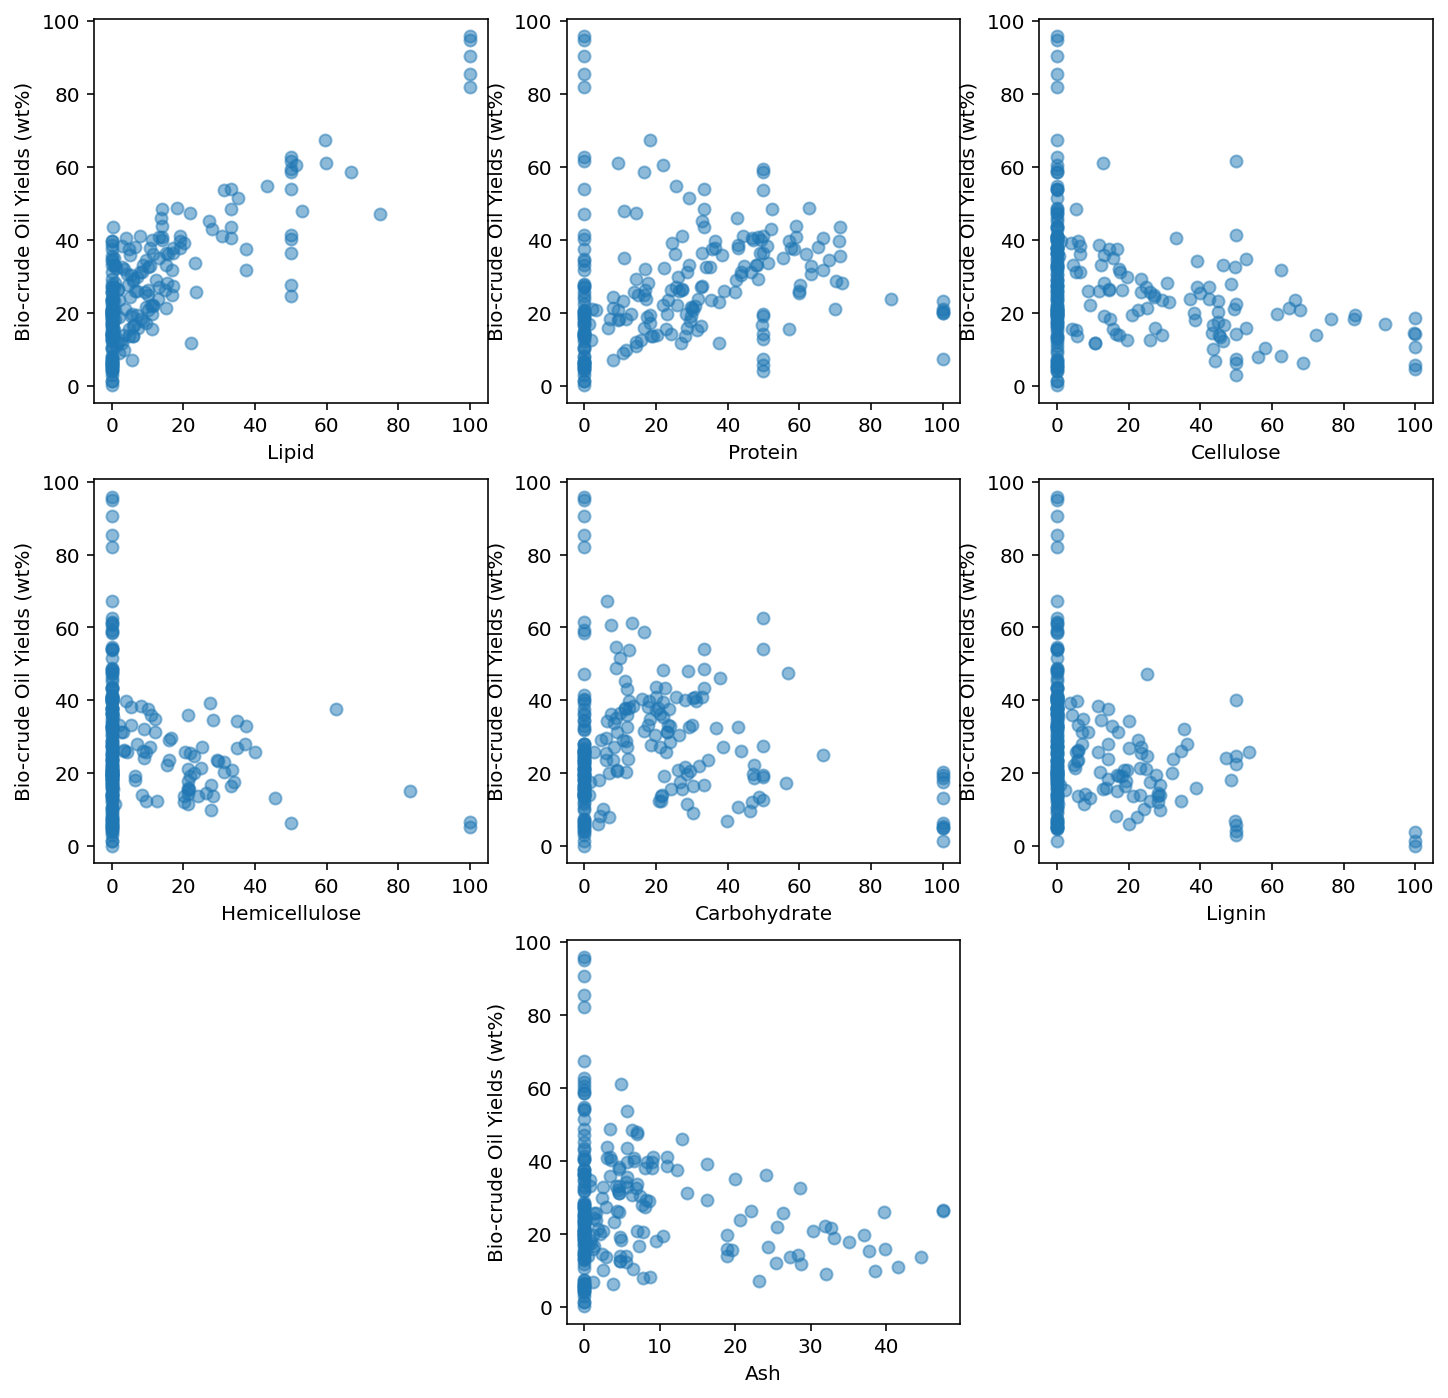

In [3]:
# Load matplotlib
import matplotlib.pyplot as plt

# Show the figure with higher resolution
%config InlineBackend.figure_format = 'retina'

# Adjust the size of figure
plt.figure(figsize=(12,12))

plt.subplot(331)
plt.xlabel('Lipid')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Lipid'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(332)
plt.xlabel('Protein')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Protein'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(333)
plt.xlabel('Cellulose')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Cellulose'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(334)
plt.xlabel('Hemicellulose')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Hemicellulose'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(335)
plt.xlabel('Carbohydrate')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Carbohydrate'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(336)
plt.xlabel('Lignin')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Lignin'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(338)
plt.xlabel('Ash')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Ash'],data['Bio-crude Oil Yield'],alpha = 0.5)
plt.show()

(array([ 3.,  2.,  8.,  8.,  3.,  5., 10., 13., 11., 12., 20.,  8., 11.,
        12., 11.,  6.,  9.,  9.,  8., 10.,  8.,  8.,  4.,  2.,  2.,  4.,
         1.,  0.,  4.,  0.,  3.,  2.,  2.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  2.]),
 array([ 0.1   ,  2.0152,  3.9304,  5.8456,  7.7608,  9.676 , 11.5912,
        13.5064, 15.4216, 17.3368, 19.252 , 21.1672, 23.0824, 24.9976,
        26.9128, 28.828 , 30.7432, 32.6584, 34.5736, 36.4888, 38.404 ,
        40.3192, 42.2344, 44.1496, 46.0648, 47.98  , 49.8952, 51.8104,
        53.7256, 55.6408, 57.556 , 59.4712, 61.3864, 63.3016, 65.2168,
        67.132 , 69.0472, 70.9624, 72.8776, 74.7928, 76.708 , 78.6232,
        80.5384, 82.4536, 84.3688, 86.284 , 88.1992, 90.1144, 92.0296,
        93.9448, 95.86  ]),
 <a list of 50 Patch objects>)

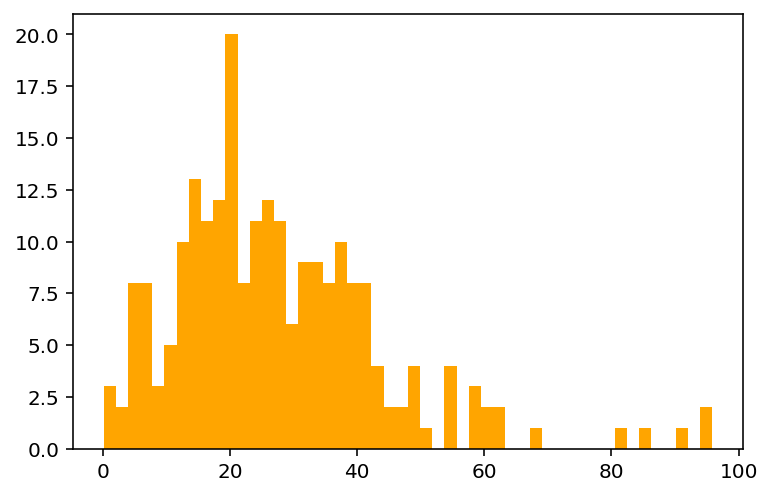

In [4]:
plt.hist(data['Bio-crude Oil Yield'],bins=50,color='orange')

(array([105.,  11.,  15.,  10.,  10.,  11.,   9.,   7.,   5.,   4.,   2.,
          3.,   0.,   2.,   0.,   2.,   4.,   1.,   2.,   0.,   0.,   1.,
          0.,   0.,  10.,   1.,   1.,   0.,   0.,   2.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   5.]),
 array([1.000000e-03, 2.000980e+00, 4.000960e+00, 6.000940e+00,
        8.000920e+00, 1.000090e+01, 1.200088e+01, 1.400086e+01,
        1.600084e+01, 1.800082e+01, 2.000080e+01, 2.200078e+01,
        2.400076e+01, 2.600074e+01, 2.800072e+01, 3.000070e+01,
        3.200068e+01, 3.400066e+01, 3.600064e+01, 3.800062e+01,
        4.000060e+01, 4.200058e+01, 4.400056e+01, 4.600054e+01,
        4.800052e+01, 5.000050e+01, 5.200048e+01, 5.400046e+01,
        5.600044e+01, 5.800042e+01, 6.000040e+01, 6.200038e+01,
        6.400036e+01, 6.600034e+01, 6.800032e+01, 7.000030e+01,
        7.200028e+01, 7.400026e+01, 7.600024e+01, 7.800022e+01,
        8.000020e+

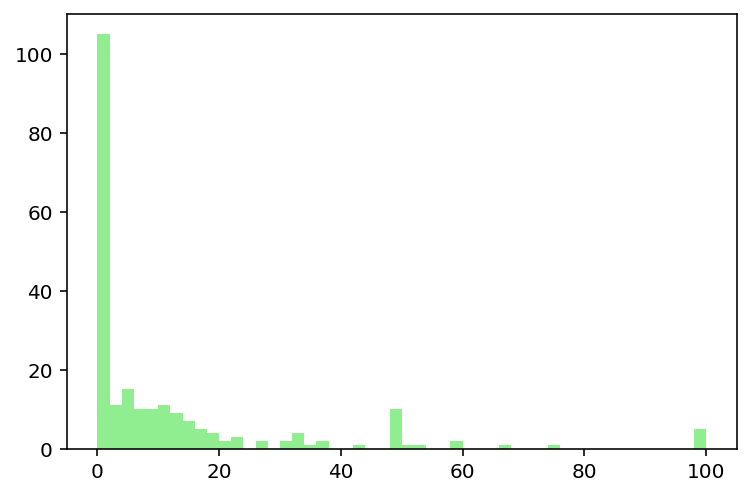

In [5]:
plt.hist(data['Lipid'],bins=50,color='lightgreen')


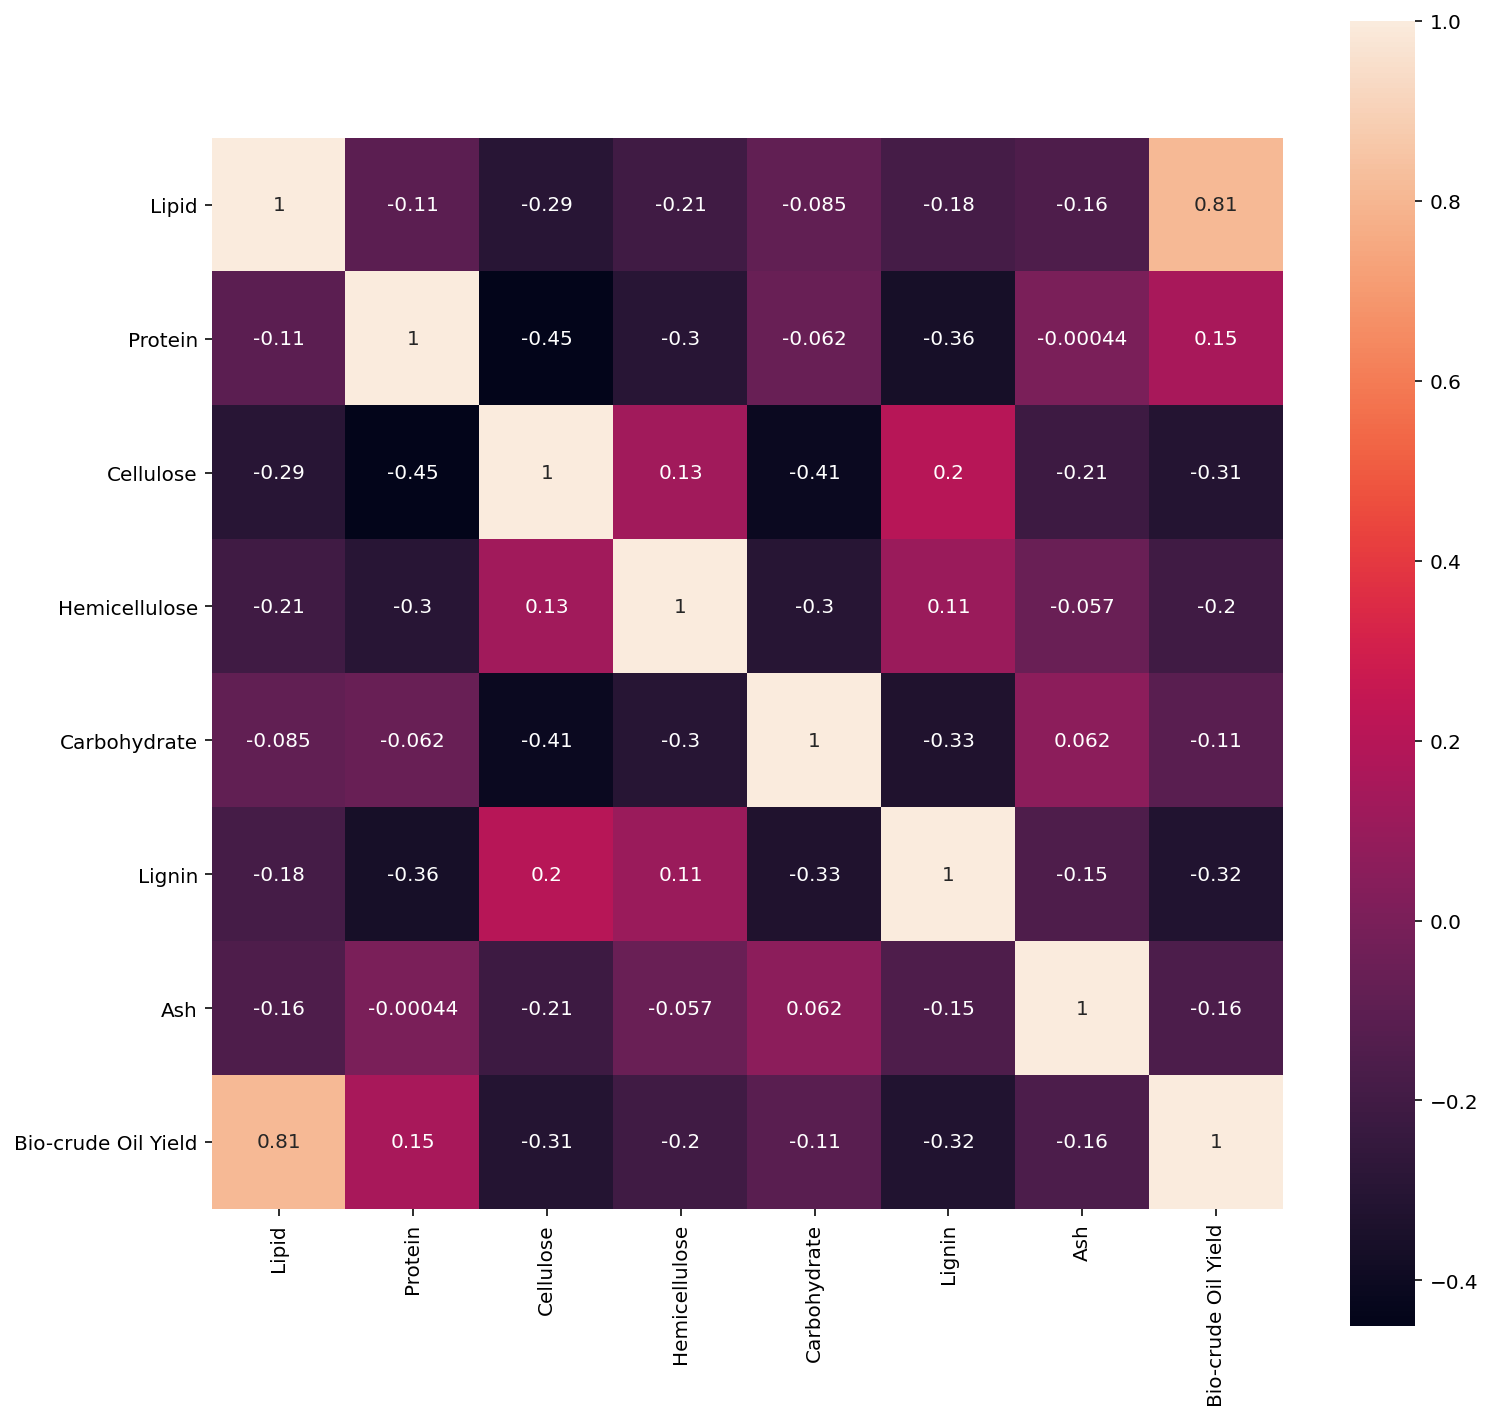

In [6]:
# Correlation
import seaborn as sns
fig=plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),vmax=1,square=True,annot=True)
plt.show()

In [7]:
import numpy as np
# The mean relative error (MRE) is commonly used to measure the predictive accuracy of models.

def performance_metric(y_true, y_predict):
  """Calculates and returns the performance score between 
        true and predicted values based on the metric chosen."""
  # TODO: Calculate the performance score between 'y_true' and 'y_predict'

  return np.mean(np.abs(y_true-y_predict))/np.mean(y_true)

In [8]:
# Model set up
from sklearn.linear_model import LinearRegression

# Modified Ridge Regression
# Model set up & training
from sklearn.linear_model import Ridge

# Model set up & training
from sklearn.linear_model import Lasso

# TODO: Import 'DecisionTreeRegressor'
from sklearn.tree import DecisionTreeRegressor

# TODO: Import 'RandomForestRegressor'
from sklearn.ensemble import RandomForestRegressor

# TODO: Import 'RandomForestRegressor'
from xgboost import XGBRegressor

# TODO: Import 'SVM'
from sklearn.svm import SVR

#apply multi-layer perceptron to data
from sklearn.neural_network import MLPRegressor
# https://scikit-learn.org/stable/modules/neural_networks_supervised.html

# TODO: Import 'KFold'
from sklearn.model_selection import KFold

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 79)
data['random'] = np.random.random(size = len(data))


# Lets split the data into 5 folds.  
kf =KFold(n_splits=5, shuffle=True)

cnt = 1

# MLR
MAE_LR_train_all=[]
MAE_LR_test_all=[]
y_LR_train_rmse_all=[]
y_LR_test_rmse_all=[]
r2_LR_train_all=[]
r2_LR_test_all=[]
MRE_LR_train_all=[]
MRE_LR_test_all=[]
y_LR_pred_list=[]

# Ridge
MAE_RD_train_all=[]
MAE_RD_test_all=[]
y_RD_train_rmse_all=[]
y_RD_test_rmse_all=[]
r2_RD_train_all=[]
r2_RD_test_all=[]
MRE_RD_train_all=[]
MRE_RD_test_all=[]
y_RD_pred_list=[]

# Lasso
MAE_LS_train_all=[]
MAE_LS_test_all=[]
y_LS_train_rmse_all=[]
y_LS_test_rmse_all=[]
r2_LS_train_all=[]
r2_LS_test_all=[]
MRE_LS_train_all=[]
MRE_LS_test_all=[]
y_LS_pred_list=[]

# DT
MAE_DT_train_all=[]
MAE_DT_test_all=[]
y_DT_train_rmse_all=[]
y_DT_test_rmse_all=[]
r2_DT_train_all=[]
r2_DT_test_all=[]
MRE_DT_train_all=[]
MRE_DT_test_all=[]
y_DT_pred_list=[]

# RF
MAE_RF_train_all=[]
MAE_RF_test_all=[]
y_RF_train_rmse_all=[]
y_RF_test_rmse_all=[]
r2_RF_train_all=[]
r2_RF_test_all=[]
MRE_RF_train_all=[]
MRE_RF_test_all=[]
y_RF_pred_list=[]

# XGBoost
MAE_XGB_train_all=[]
MAE_XGB_test_all=[]
y_XGB_train_rmse_all=[]
y_XGB_test_rmse_all=[]
r2_XGB_train_all=[]
r2_XGB_test_all=[]
MRE_XGB_train_all=[]
MRE_XGB_test_all=[]
y_XGB_pred_list=[]

# SVM
MAE_SVM_train_all=[]
MAE_SVM_test_all=[]
y_SVM_train_rmse_all=[]
y_SVM_test_rmse_all=[]
r2_SVM_train_all=[]
r2_SVM_test_all=[]
MRE_SVM_train_all=[]
MRE_SVM_test_all=[]
y_SVM_pred_list=[]

# ANN
MAE_ANN_train_all=[]
MAE_ANN_test_all=[]
y_ANN_train_rmse_all=[]
y_ANN_test_rmse_all=[]
r2_ANN_train_all=[]
r2_ANN_test_all=[]
MRE_ANN_train_all=[]
MRE_ANN_test_all=[]
y_ANN_pred_list=[]


y_test_list=[]

# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    # fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]

    # MLR
    # Model instantiation
    LR=LinearRegression()
    # Model training
    LR.fit(X_train,y_train)
    # Predict training set and test set
    y_LR_train_predict = LR.predict(X_train)
    y_LR_test_predict = LR.predict(X_test)
    MAE_LR_train = metrics.mean_absolute_error(y_train, y_LR_train_predict)
    MAE_LR_test = metrics.mean_absolute_error(y_test, y_LR_test_predict)
    y_LR_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_LR_train_predict))
    y_LR_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_LR_test_predict))
    r2_LR_train = metrics.r2_score(y_train, y_LR_train_predict)
    r2_LR_test = metrics.r2_score(y_test, y_LR_test_predict)
    MRE_LR_train = performance_metric(y_train, y_LR_train_predict)
    MRE_LR_test = performance_metric(y_test, y_LR_test_predict)

    # Ridge
    rd=Ridge(alpha=4238.913057338775)
    fit_intercept=False
    rd.fit(X_train, y_train)
    # Predict training set and test set
    y_RD_train_predict = rd.predict(X_train)
    y_RD_test_predict = rd.predict(X_test)
    MAE_RD_train = metrics.mean_absolute_error(y_train, y_RD_train_predict)
    MAE_RD_test = metrics.mean_absolute_error(y_test, y_RD_test_predict)
    y_RD_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_RD_train_predict))
    y_RD_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_RD_test_predict))
    r2_RD_train = metrics.r2_score(y_train, y_RD_train_predict)
    r2_RD_test = metrics.r2_score(y_test, y_RD_test_predict)
    MRE_RD_train = performance_metric(y_train, y_RD_train_predict)
    MRE_RD_test = performance_metric(y_test, y_RD_test_predict)

    # Lasso
    Las = Lasso(alpha=11.017528137883874)
    fit_intercept=False
    Las.fit(X_train,y_train)
    # Predict training set and test set
    y_LS_train_predict = Las.predict(X_train)
    y_LS_test_predict = Las.predict(X_test)
    MAE_LS_train = metrics.mean_absolute_error(y_train, y_LS_train_predict)
    MAE_LS_test = metrics.mean_absolute_error(y_test, y_LS_test_predict)
    y_LS_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_LS_train_predict))
    y_LS_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_LS_test_predict))
    r2_LS_train = metrics.r2_score(y_train, y_LS_train_predict)
    r2_LS_test = metrics.r2_score(y_test, y_LS_test_predict)
    MRE_LS_train = performance_metric(y_train, y_LS_train_predict)
    MRE_LS_test = performance_metric(y_test, y_LS_test_predict)


    # DT
    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':10}
    # TODO: Create a decision tree regressor object
    dt = DecisionTreeRegressor(**params)
    # Model training
    dt.fit(X_train, y_train)
    # Predict training set and test set
    y_DT_train_predict = dt.predict(X_train)
    y_DT_test_predict = dt.predict(X_test)
    MAE_DT_train = metrics.mean_absolute_error(y_train, y_DT_train_predict)
    MAE_DT_test = metrics.mean_absolute_error(y_test, y_DT_test_predict)
    y_DT_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_DT_train_predict))
    y_DT_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_DT_test_predict))
    r2_DT_train = metrics.r2_score(y_train, y_DT_train_predict)
    r2_DT_test = metrics.r2_score(y_test, y_DT_test_predict)
    MRE_DT_train = performance_metric(y_train, y_DT_train_predict)
    MRE_DT_test = performance_metric(y_test, y_DT_test_predict)
    
    # RF
    params = {'n_estimators':170,'max_depth':10,'min_samples_leaf':2,'min_samples_split':2,'max_features':5}
    rf = RandomForestRegressor(**params)
    rf.fit(X_train, y_train)
    # Predict training set and test set
    y_RF_train_predict = rf.predict(X_train)
    y_RF_test_predict = rf.predict(X_test)
    MAE_RF_train = metrics.mean_absolute_error(y_train, y_RF_train_predict)
    MAE_RF_test = metrics.mean_absolute_error(y_test, y_RF_test_predict)
    y_RF_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_RF_train_predict))
    y_RF_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_RF_test_predict))
    r2_RF_train = metrics.r2_score(y_train, y_RF_train_predict)
    r2_RF_test = metrics.r2_score(y_test, y_RF_test_predict)
    MRE_RF_train = performance_metric(y_train, y_RF_train_predict)
    MRE_RF_test = performance_metric(y_test, y_RF_test_predict)



    # XGBoost
    other_params = {'eta': 0.01, 'n_estimators': 50, 'gamma': 0, 'max_depth': 14, 'min_child_weight': 1,
                'colsample_bytree': 0.64, 'colsample_bylevel': 1, 'subsample': 0.6, 'reg_lambda': 0.9169, 'reg_alpha': 0.19,
                'seed': 15}
    xgb = XGBRegressor(**other_params,silent = True)
    # Model training
    xgb.fit(X_train, y_train)
    y_XGB_train_predict = xgb.predict(X_train)
    y_XGB_test_predict = xgb.predict(X_test)
    MAE_XGB_train = metrics.mean_absolute_error(y_train, y_XGB_train_predict)
    MAE_XGB_test = metrics.mean_absolute_error(y_test, y_XGB_test_predict)
    y_XGB_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_XGB_train_predict))
    y_XGB_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_XGB_test_predict))
    r2_XGB_train = metrics.r2_score(y_train, y_XGB_train_predict)
    r2_XGB_test = metrics.r2_score(y_test, y_XGB_test_predict)
    MRE_XGB_train = performance_metric(y_train, y_XGB_train_predict)
    MRE_XGB_test = performance_metric(y_test, y_XGB_test_predict)

    # SVM
    svr = SVR(kernel='linear', C=100, gamma='auto')
    svr.fit(X_train, y_train)
    y_SVM_train_predict = svr.predict(X_train)
    y_SVM_test_predict = svr.predict(X_test)
    MAE_SVM_train = metrics.mean_absolute_error(y_train, y_SVM_train_predict)
    MAE_SVM_test = metrics.mean_absolute_error(y_test, y_SVM_test_predict)
    y_SVM_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_SVM_train_predict))
    y_SVM_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_SVM_test_predict))
    r2_SVM_train = metrics.r2_score(y_train, y_SVM_train_predict)
    r2_SVM_test = metrics.r2_score(y_test, y_SVM_test_predict)
    MRE_SVM_train = performance_metric(y_train, y_SVM_train_predict)
    MRE_SVM_test = performance_metric(y_test, y_SVM_test_predict)

    # ANN: Multi-Layer Perceptron (MLP)
    mlpr = MLPRegressor(hidden_layer_sizes=(189,),max_iter=500, 
                       learning_rate_init=0.001,early_stopping=True)
    # Model training
    mlpr.fit(X_train,y_train)
    # Predict training set and test set
    y_ANN_train_predict = mlpr.predict(X_train)
    y_ANN_test_predict = mlpr.predict(X_test)
    MAE_ANN_train = metrics.mean_absolute_error(y_train, y_ANN_train_predict)
    MAE_ANN_test = metrics.mean_absolute_error(y_test, y_ANN_test_predict)
    y_ANN_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_ANN_train_predict))
    y_ANN_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_ANN_test_predict))
    r2_ANN_train = metrics.r2_score(y_train, y_ANN_train_predict)
    r2_ANN_test = metrics.r2_score(y_test, y_ANN_test_predict)
    MRE_ANN_train = performance_metric(y_train, y_ANN_train_predict)
    MRE_ANN_test = performance_metric(y_test, y_ANN_test_predict)





    cnt += 1



    # MLR
    MAE_LR_train_all.append(MAE_LR_train)
    MAE_LR_test_all.append(MAE_LR_test)
    y_LR_train_rmse_all.append(y_LR_train_rmse)
    y_LR_test_rmse_all.append(y_LR_test_rmse)
    r2_LR_train_all.append(r2_LR_train)
    r2_LR_test_all.append(r2_LR_test)
    MRE_LR_train_all.append(MRE_LR_train)
    MRE_LR_test_all.append(MRE_LR_test)
    y_LR_pred_list.append(y_LR_test_predict)

    # Ridge
    MAE_RD_train_all.append(MAE_RD_train)
    MAE_RD_test_all.append(MAE_RD_test)
    y_RD_train_rmse_all.append(y_RD_train_rmse)
    y_RD_test_rmse_all.append(y_RD_test_rmse)
    r2_RD_train_all.append(r2_RD_train)
    r2_RD_test_all.append(r2_RD_test)
    MRE_RD_train_all.append(MRE_RD_train)
    MRE_RD_test_all.append(MRE_RD_test)
    y_RD_pred_list.append(y_RD_test_predict)

    # Lasso
    MAE_LS_train_all.append(MAE_LS_train)
    MAE_LS_test_all.append(MAE_LS_test)
    y_LS_train_rmse_all.append(y_LS_train_rmse)
    y_LS_test_rmse_all.append(y_LS_test_rmse)
    r2_LS_train_all.append(r2_LS_train)
    r2_LS_test_all.append(r2_LS_test)
    MRE_LS_train_all.append(MRE_LS_train)
    MRE_LS_test_all.append(MRE_LS_test)
    y_LS_pred_list.append(y_LS_test_predict)

    # DT
    MAE_DT_train_all.append(MAE_DT_train)
    MAE_DT_test_all.append(MAE_DT_test)
    y_DT_train_rmse_all.append(y_DT_train_rmse)
    y_DT_test_rmse_all.append(y_DT_test_rmse)
    r2_DT_train_all.append(r2_DT_train)
    r2_DT_test_all.append(r2_DT_test)
    MRE_DT_train_all.append(MRE_DT_train)
    MRE_DT_test_all.append(MRE_DT_test)
    y_DT_pred_list.append(y_DT_test_predict)

    # RF
    MAE_RF_train_all.append(MAE_RF_train)
    MAE_RF_test_all.append(MAE_RF_test)
    y_RF_train_rmse_all.append(y_RF_train_rmse)
    y_RF_test_rmse_all.append(y_RF_test_rmse)
    r2_RF_train_all.append(r2_RF_train)
    r2_RF_test_all.append(r2_RF_test)
    MRE_RF_train_all.append(MRE_RF_train)
    MRE_RF_test_all.append(MRE_RF_test)
    y_RF_pred_list.append(y_RF_test_predict)

    # XGBoost
    MAE_XGB_train_all.append(MAE_XGB_train)
    MAE_XGB_test_all.append(MAE_XGB_test)
    y_XGB_train_rmse_all.append(y_XGB_train_rmse)
    y_XGB_test_rmse_all.append(y_XGB_test_rmse)
    r2_XGB_train_all.append(r2_XGB_train)
    r2_XGB_test_all.append(r2_XGB_test)
    MRE_XGB_train_all.append(MRE_XGB_train)
    MRE_XGB_test_all.append(MRE_XGB_test)
    y_XGB_pred_list.append(y_XGB_test_predict)

    # SVM
    MAE_SVM_train_all.append(MAE_SVM_train)
    MAE_SVM_test_all.append(MAE_SVM_test)
    y_SVM_train_rmse_all.append(y_SVM_train_rmse)
    y_SVM_test_rmse_all.append(y_SVM_test_rmse)
    r2_SVM_train_all.append(r2_SVM_train)
    r2_SVM_test_all.append(r2_SVM_test)
    MRE_SVM_train_all.append(MRE_SVM_train)
    MRE_SVM_test_all.append(MRE_SVM_test)
    y_SVM_pred_list.append(y_SVM_test_predict)

    # ANN
    MAE_ANN_train_all.append(MAE_ANN_train)
    MAE_ANN_test_all.append(MAE_ANN_test)
    y_ANN_train_rmse_all.append(y_ANN_train_rmse)
    y_ANN_test_rmse_all.append(y_ANN_test_rmse)
    r2_ANN_train_all.append(r2_ANN_train)
    r2_ANN_test_all.append(r2_ANN_test)
    MRE_ANN_train_all.append(MRE_ANN_train)
    MRE_ANN_test_all.append(MRE_ANN_test)
    y_ANN_pred_list.append(y_ANN_test_predict)



    y_test_list.append(y_test.values)


y_LR_pred_all=np.concatenate(y_LR_pred_list, axis=0)
y_RD_pred_all=np.concatenate(y_RD_pred_list, axis=0)
y_LS_pred_all=np.concatenate(y_LS_pred_list, axis=0)
y_DT_pred_all=np.concatenate(y_DT_pred_list, axis=0)
y_RF_pred_all=np.concatenate(y_RF_pred_list, axis=0)
y_XGB_pred_all=np.concatenate(y_XGB_pred_list, axis=0)
y_SVM_pred_all=np.concatenate(y_SVM_pred_list, axis=0)
y_ANN_pred_all=np.concatenate(y_ANN_pred_list, axis=0)

y_test_all=np.concatenate(y_test_list, axis=0)


# MLR
print("MLR==============================================================================")
print("Mean value of MAE of training set", np.mean(MAE_LR_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_LR_train_all))
print("Mean value of MAE of test set", np.mean(MAE_LR_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_LR_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_LR_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_LR_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_LR_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_LR_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_LR_train_all))
print("Standard deviation of R2 of training set", np.std(r2_LR_train_all))
print("Mean value of R2 of test set", np.mean(r2_LR_test_all))
print("Standard deviation of R2 of test set", np.std(r2_LR_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_LR_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_LR_train_all))
print("Mean value of MRE of test set", np.mean(MRE_LR_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_LR_test_all))
print("")

# Ridge
print("Ridge=============================================================================")
print("Mean value of MAE of training set", np.mean(MAE_RD_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_RD_train_all))
print("Mean value of MAE of test set", np.mean(MAE_RD_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_RD_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_RD_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_RD_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_RD_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_RD_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_RD_train_all))
print("Standard deviation of R2 of training set", np.std(r2_RD_train_all))
print("Mean value of R2 of test set", np.mean(r2_RD_test_all))
print("Standard deviation of R2 of test set", np.std(r2_RD_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_RD_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_RD_train_all))
print("Mean value of MRE of test set", np.mean(MRE_RD_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_RD_test_all))
print("")

# Lasso
print("Lasso=============================================================================")
print("Mean value of MAE of training set", np.mean(MAE_LS_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_LS_train_all))
print("Mean value of MAE of test set", np.mean(MAE_LS_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_LS_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_LS_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_LS_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_LS_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_LS_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_LS_train_all))
print("Standard deviation of R2 of training set", np.std(r2_LS_train_all))
print("Mean value of R2 of test set", np.mean(r2_LS_test_all))
print("Standard deviation of R2 of test set", np.std(r2_LS_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_LS_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_LS_train_all))
print("Mean value of MRE of test set", np.mean(MRE_LS_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_LS_test_all))
print("")

# DT
print("DT===============================================================================")
print("Mean value of MAE of training set", np.mean(MAE_DT_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_DT_train_all))
print("Mean value of MAE of test set", np.mean(MAE_DT_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_DT_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_DT_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_DT_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_DT_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_DT_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_DT_train_all))
print("Standard deviation of R2 of training set", np.std(r2_DT_train_all))
print("Mean value of R2 of test set", np.mean(r2_DT_test_all))
print("Standard deviation of R2 of test set", np.std(r2_DT_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_DT_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_DT_train_all))
print("Mean value of MRE of test set", np.mean(MRE_DT_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_DT_test_all))
print("")

# RF
print("RF===============================================================================")
print("Mean value of MAE of training set", np.mean(MAE_RF_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_RF_train_all))
print("Mean value of MAE of test set", np.mean(MAE_RF_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_RF_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_RF_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_RF_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_RF_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_RF_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_RF_train_all))
print("Standard deviation of R2 of training set", np.std(r2_RF_train_all))
print("Mean value of R2 of test set", np.mean(r2_RF_test_all))
print("Standard deviation of R2 of test set", np.std(r2_RF_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_RF_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_RF_train_all))
print("Mean value of MRE of test set", np.mean(MRE_RF_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_RF_test_all))
print("")

# XGBoost
print("XGBoost===========================================================================")
print("Mean value of MAE of training set", np.mean(MAE_XGB_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_XGB_train_all))
print("Mean value of MAE of test set", np.mean(MAE_XGB_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_XGB_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_XGB_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_XGB_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_XGB_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_XGB_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_XGB_train_all))
print("Standard deviation of R2 of training set", np.std(r2_XGB_train_all))
print("Mean value of R2 of test set", np.mean(r2_XGB_test_all))
print("Standard deviation of R2 of test set", np.std(r2_XGB_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_XGB_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_XGB_train_all))
print("Mean value of MRE of test set", np.mean(MRE_XGB_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_XGB_test_all))
print("")

# SVM
print("SVM===========================================================================")
print("Mean value of MAE of training set", np.mean(MAE_SVM_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_SVM_train_all))
print("Mean value of MAE of test set", np.mean(MAE_SVM_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_SVM_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_SVM_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_SVM_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_SVM_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_SVM_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_SVM_train_all))
print("Standard deviation of R2 of training set", np.std(r2_SVM_train_all))
print("Mean value of R2 of test set", np.mean(r2_SVM_test_all))
print("Standard deviation of R2 of test set", np.std(r2_SVM_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_SVM_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_SVM_train_all))
print("Mean value of MRE of test set", np.mean(MRE_SVM_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_SVM_test_all))
print("")

# ANN
print("ANN===============================================================================")
print("Mean value of MAE of training set", np.mean(MAE_ANN_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_ANN_train_all))
print("Mean value of MAE of test set", np.mean(MAE_ANN_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_ANN_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_ANN_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_ANN_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_ANN_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_ANN_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_ANN_train_all))
print("Standard deviation of R2 of training set", np.std(r2_ANN_train_all))
print("Mean value of R2 of test set", np.mean(r2_ANN_test_all))
print("Standard deviation of R2 of test set", np.std(r2_ANN_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_ANN_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_ANN_train_all))
print("Mean value of MRE of test set", np.mean(MRE_ANN_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_ANN_test_all))
print("")


#print(len(np.concatenate(y_LR_pred_list, axis=0)))
#print(len(np.concatenate(y_RD_pred_list, axis=0)))
#print(len(np.concatenate(y_LS_pred_list, axis=0)))
#print(len(np.concatenate(y_DT_pred_list, axis=0)))
#print(len(np.concatenate(y_RF_pred_list, axis=0)))
#print(len(np.concatenate(y_XGB_pred_list, axis=0)))
#print(len(np.concatenate(y_SVM_pred_list, axis=0)))
#print(len(np.concatenate(y_ANN_pred_list, axis=0)))

#print(len(np.concatenate(y_test_list, axis=0)))

MLR==============================================================================
Mean value of MAE of training set 6.783311176991124
Standard deviation of MAE of training set 0.21583375575979294
Mean value of MAE of test set 7.122890125984215
Standard deviation of MAE of test set 0.8381080079702017

Mean value of RMSE of training set 8.554244832452412
Standard deviation of RMSE of training set 0.24554058667561254
Mean value of RMSE of test set 8.879268454173918
Standard deviation of RMSE of test set 1.0461395129419566

Mean value of R2 of training set 0.7375292194879004
Standard deviation of R2 of training set 0.017635547423085866
Mean value of R2 of test set 0.7094223310831429
Standard deviation of R2 of test set 0.07436160497410818

Mean value of MRE of training set 0.24726153598914
Standard deviation of MRE of training set 0.008893043577623003
Mean value of MRE of test set 0.26028165821906785
Standard deviation of MRE of test set 0.03507755777691991

Ridge==========================

Text(0.5, 1.0, 'y_ANN_pred vs. y_true')

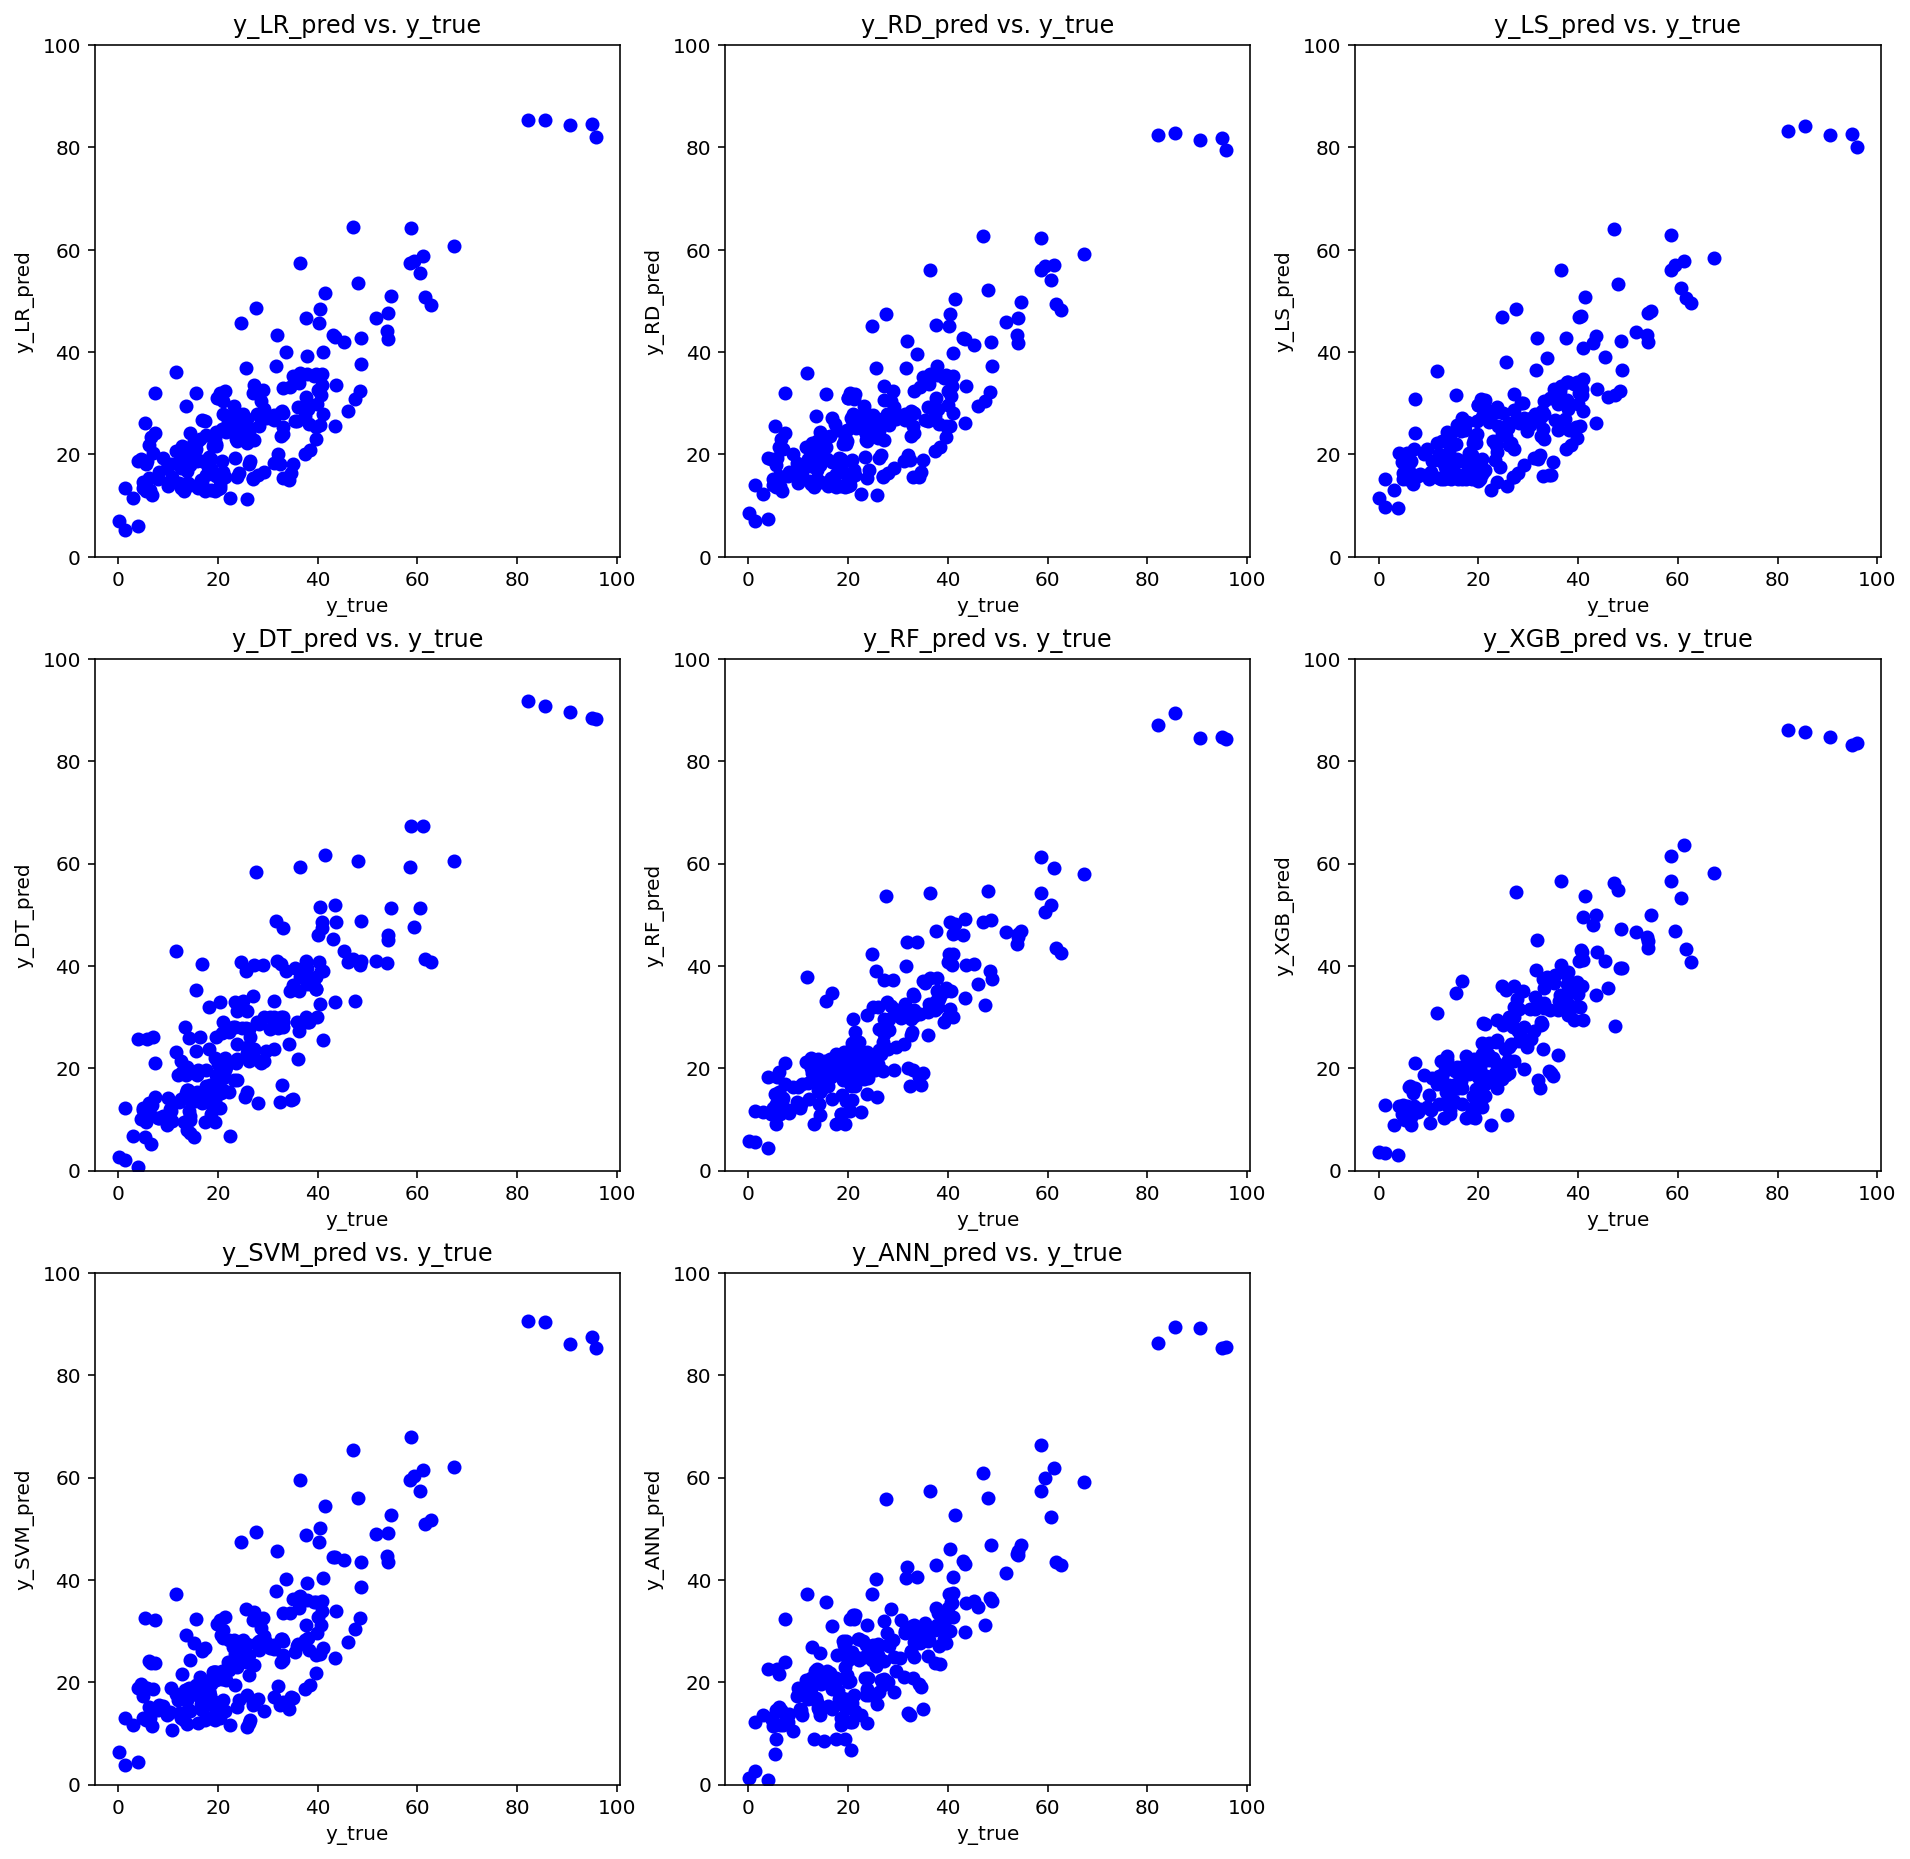

In [14]:
# Load matplotlib
import matplotlib.pyplot as plt

# Show the figure with higher resolution
%config InlineBackend.figure_format = 'retina'

# Adjust the size of figure
plt.figure(figsize=(16,16))

plt.subplot(331)
plt.plot(y_test_all, y_LR_pred_all, 'bo')
plt.ylim(0, 100)
plt.xlabel('y_true')
plt.ylabel('y_LR_pred')
plt.title('y_LR_pred vs. y_true')

plt.subplot(332)
plt.plot(y_test_all, y_RD_pred_all, 'bo')
plt.ylim(0, 100)
plt.xlabel('y_true')
plt.ylabel('y_RD_pred')
plt.title('y_RD_pred vs. y_true')

plt.subplot(333)
plt.plot(y_test_all, y_LS_pred_all, 'bo')
plt.ylim(0, 100)
plt.xlabel('y_true')
plt.ylabel('y_LS_pred')
plt.title('y_LS_pred vs. y_true')

plt.subplot(334)
plt.plot(y_test_all, y_DT_pred_all, 'bo')
plt.ylim(0, 100)
plt.xlabel('y_true')
plt.ylabel('y_DT_pred')
plt.title('y_DT_pred vs. y_true')

plt.subplot(335)
plt.plot(y_test_all, y_RF_pred_all, 'bo')
plt.ylim(0, 100)
plt.xlabel('y_true')
plt.ylabel('y_RF_pred')
plt.title('y_RF_pred vs. y_true')

plt.subplot(336)
plt.plot(y_test_all, y_XGB_pred_all, 'bo')
plt.ylim(0, 100)
plt.xlabel('y_true')
plt.ylabel('y_XGB_pred')
plt.title('y_XGB_pred vs. y_true')

plt.subplot(337)
plt.plot(y_test_all, y_SVM_pred_all, 'bo')
plt.ylim(0, 100)
plt.xlabel('y_true')
plt.ylabel('y_SVM_pred')
plt.title('y_SVM_pred vs. y_true')

plt.subplot(338)
plt.plot(y_test_all, y_ANN_pred_all, 'bo')
plt.ylim(0, 100)
plt.xlabel('y_true')
plt.ylabel('y_ANN_pred')
plt.title('y_ANN_pred vs. y_true')

In [15]:
Parity={'Predict Data':y_LR_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_LR.csv', index = False, header=True)

Parity={'Predict Data':y_RD_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_RD.csv', index = False, header=True)

Parity={'Predict Data':y_LS_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_LS.csv', index = False, header=True)

Parity={'Predict Data':y_DT_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_DT.csv', index = False, header=True)

Parity={'Predict Data':y_RF_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_RF.csv', index = False, header=True)

Parity={'Predict Data':y_XGB_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_XGB.csv', index = False, header=True)

Parity={'Predict Data':y_SVM_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_SVM.csv', index = False, header=True)

Parity={'Predict Data':y_ANN_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_ANN.csv', index = False, header=True)